<a href="https://colab.research.google.com/github/XTMay/ML_DL/blob/main/Lecture_5/Nonlinear_Algorithms_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part_1 Principal Component Analysis（PCA）
### (1) PCA for Data Visualization

#### Step 1: Load the Iris Data Set

The iris data set comes with scikit-learn and doesn’t require you to download any files from some external websites. The code below will load the Iris data set.

In [ ]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

#### Step 2: Standardize the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

#### Step 3: PCA Projection to 2D


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

#### Step 4: Visualize 2D Projection


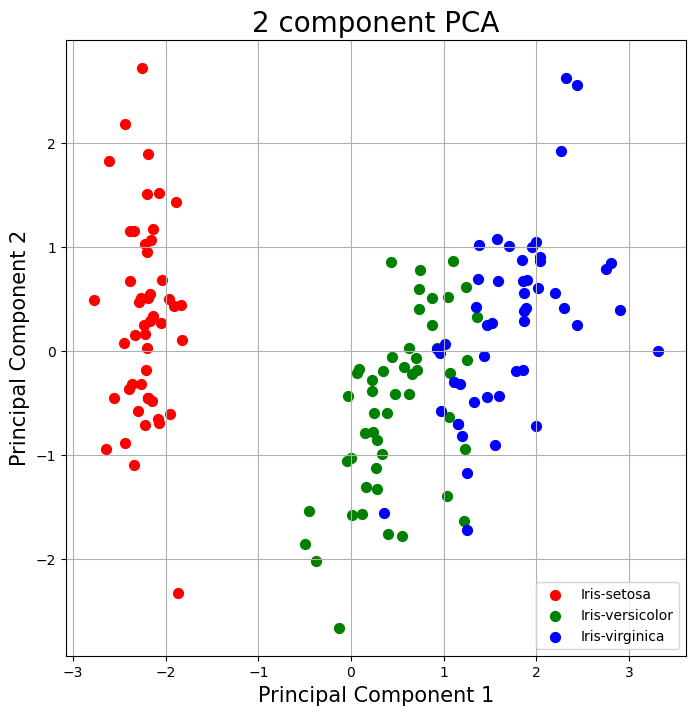

In [ ]:
import matplotlib.pyplot as plt # Visualization

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Explained Variance

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

### (2) PCA to Speed-Up Machine Learning Algorithms

#### Step 1: Download and Load the Data


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

#### Step 2: Split Data Into Training and Test Sets


In [ ]:
from sklearn.model_selection import train_test_split

# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

#### Step 3: Standardize the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

#### Step 4: Import and Apply PCA


In [ ]:
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)

In [ ]:
pca.fit(train_img)

PCA(n_components=0.95)

#### Step 5: Apply the Mapping (transform) to the Training Set and the Test Set.

In [ ]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

#### Step 6: Apply Logistic Regression to the Transformed Data

In [ ]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(train_img, train_lbl)
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

# Predict for One Observation (image)
logisticRegr.predict(test_img[0:10])


/Users/xiaotingzhou/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9201

#### Step 7: Measuring Model Performance

In [ ]:
logisticRegr.score(test_img, test_lbl)

0.9201

## Part_2 Classification And Regression Trees

Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression.

## Decision tree for classification
### Classification tree
#### Classif- cation-tree
   - Sequence of if-else questions about individual features.
   - Objective: infer class labels.
   - Able to capture non- linear relationships between features and labels.
   - Don 't require feature scaling (ex: Standardization,  . . )

#### Example
- Dataset: Wisconsin Breast Cancer Dataset from the UCI machine learning repository with 80% train and 20% test.
- Predict (`diagnosis`) whether a tumor is malignant or benign based on two features: the mean radius of the tumor (`radius_mean`) and its mean number of concave points (`concave points_mean`).
    - The feature matrices are assigned to X_train and X_test,
    - The arrays of labels are assigned to y_train and y_test where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor.
    - To obtain reproducible results, we also defined a variable called SEED which is set to 1.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
wbc = pd.read_csv('/Users/xiaotingzhou/Downloads/wbc.csv')
print(wbc.head())
X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
#from sklearn.tree import DecisionTreeClassifier
SEED=1
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6,random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])
print('The first five predictions made by the fitted tree on the test set in the console')

# Import accuracy_score
#from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("\nTest set accuracy: {:.2f}".format(acc))
print('Using only two features, the tree was able to achieve an accuracy of 89%!')

[0 1 0 1 0]
The first five predictions made by the fitted tree on the test set in the console

Test set accuracy: 0.84
Using only two features, the tree was able to achieve an accuracy of 89%!


### Logistic regression vs classification tree

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

A given custom function called `plot_labeled_decision_regions()` is used to plot the decision regions of a list containing two trained classifiers.



In [ ]:
pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import mlxtend.plotting
def plot_labeled_decision_regions(X_test, y_test, clfs):

    for clf in clfs:

        mlxtend.plotting.plot_decision_regions(np.array(X_test), np.array(y_test), clf=clf, legend=2)

        plt.ylim((0,0.2))

        # Adding axes annotations
        plt.xlabel(X_test.columns[0])
        plt.ylabel(X_test.columns[1])
        plt.title(str(clf).split('(')[0])
        plt.show()

/Users/xiaotingzhou/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


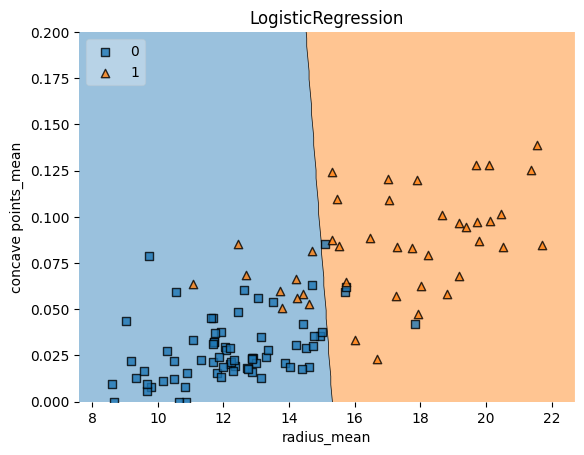

/Users/xiaotingzhou/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


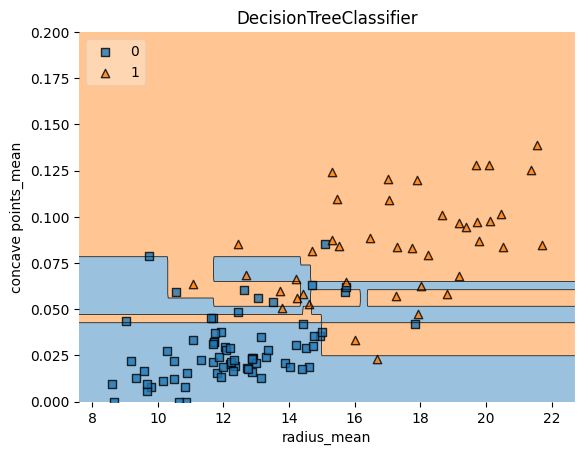

the decision boundary produced by logistic regression is linear
while the boundaries produced by the classification tree divide the feature space into rectangular regions


In [ ]:
# Import LogisticRegression from sklearn.linear_model
#from sklearn.linear_model import LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(solver = 'liblinear', random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

print('the decision boundary produced by logistic regression is linear\
\nwhile the boundaries produced by the classification tree divide the feature space into rectangular regions')

## Classification tree Learning
### Using entropy as a criterion

- With the Wisconsin Breast Cancer dataset using `entropy` as an information criterion, using all the 30 features in the dataset, which is split into 80% train and 20% test.


In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
#from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier( max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [ ]:
# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth = 8, criterion='gini', random_state=1)

# Fit dt_gini to the training set
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [ ]:
# Import accuracy_score from sklearn.metrics
#from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred_entropy= dt_entropy.predict(X_test)
y_pred_gini=dt_gini.predict(X_test)

# Evaluate accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)
print('gini is default to use when criterion not mentioned')

Accuracy achieved by using entropy:  0.8508771929824561
Accuracy achieved by using the gini index:  0.8245614035087719
gini is default to use when criterion not mentioned


## Regression tree

- predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.
- The dataset is split to 80% train and 20% test.

In [ ]:
auto= pd.read_csv('/Users/xiaotingzhou/Downloads/auto.csv')
auto_origin = pd.get_dummies(auto.origin)
auto = pd.concat([auto, auto_origin], axis = 1).drop('origin', axis = 1)
auto.columns = ['mpg', 'displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia', 'origin_Europe', 'origin_US']
auto.head()



,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,False,False,True
1,9.0,304.0,193,4732,18.5,20.0,False,False,True
2,36.1,91.0,60,1800,16.4,10.0,True,False,False
3,18.5,250.0,98,3525,19.0,15.0,False,False,True
4,34.3,97.0,78,2188,15.8,10.0,False,True,False


In [ ]:
X = auto[['displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia',
       'origin_Europe', 'origin_US']]
y = auto['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1)


In [ ]:
# Import DecisionTreeRegressor from sklearn.tree
#from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

####  mean_squared_error of Decision Tree

In [ ]:
# Import mean_squared_error from sklearn.metrics as MSE
#from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))
print('\nThe smaller the means squared error, the closer are to finding the line of best fit.\
Depending on data, it may be impossible to get a very small value for the mean squared error.\
 => try several equations, and the one that gave the smallest mean squared error would be the line of best fit.')

Test set RMSE of dt: 4.27

The smaller the means squared error, the closer are to finding the line of best fit.Depending on data, it may be impossible to get a very small value for the mean squared error. => try several equations, and the one that gave the smallest mean squared error would be the line of best fit.


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict test set labels
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 3.98
Regression Tree test set RMSE: 4.27


## Part_3 Naive Bayes

### Naive Bayes Classifier with Synthetic Dataset

#### Generating the Dataset


In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

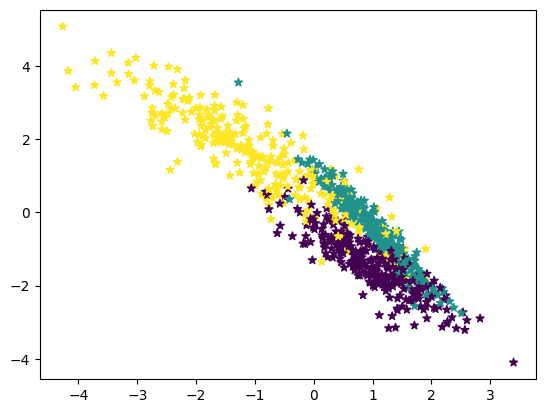

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, marker="*");

#### Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

#### Model Building and Training

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([X_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


#### Model Evaluation

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


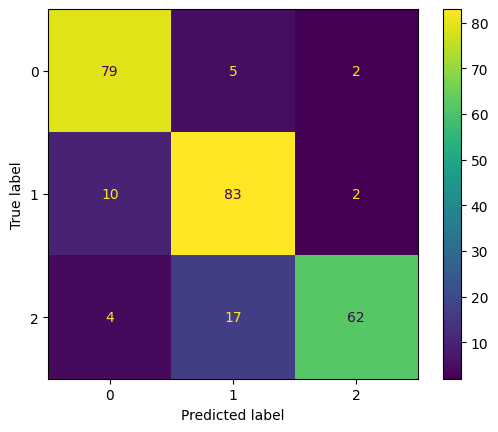

In [ ]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

## Part_4 K-Nearest Neighbors

#### 1. Importing the modules

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#### 2. Creating Dataset

In [ ]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4,cluster_std = 1.5, random_state = 4)

#### 3. Visualize the Dataset

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


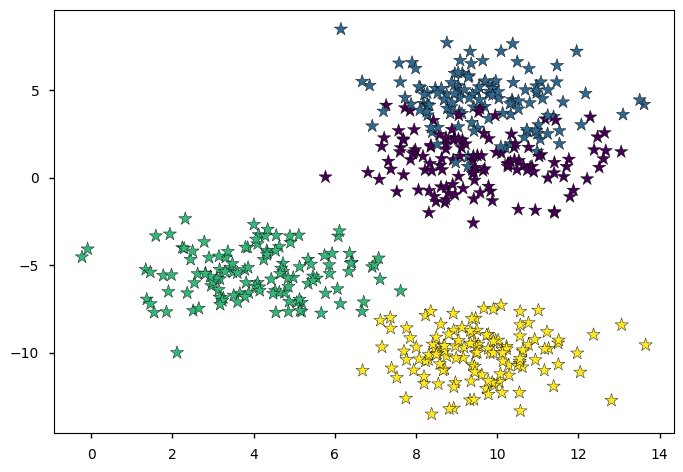

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check available styles
print(plt.style.available)

# Set the style to seaborn
plt.style.use('seaborn-v0_8-notebook')

# Example plot
plt.scatter(X[:,0], X[:,1], c=y, marker= '*',s=100,edgecolors='black')
plt.show()

#### 4. Splitting Data into Training and Testing Datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#### 5. KNN Classifier Implementation

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

#### 6. Predictions for the KNN Classifiers

In [ ]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

#### 7. Predict Accuracy for both k values

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=5 93.60000000000001
Accuracy with k=1 90.4


#### 8. Visualize Predictions

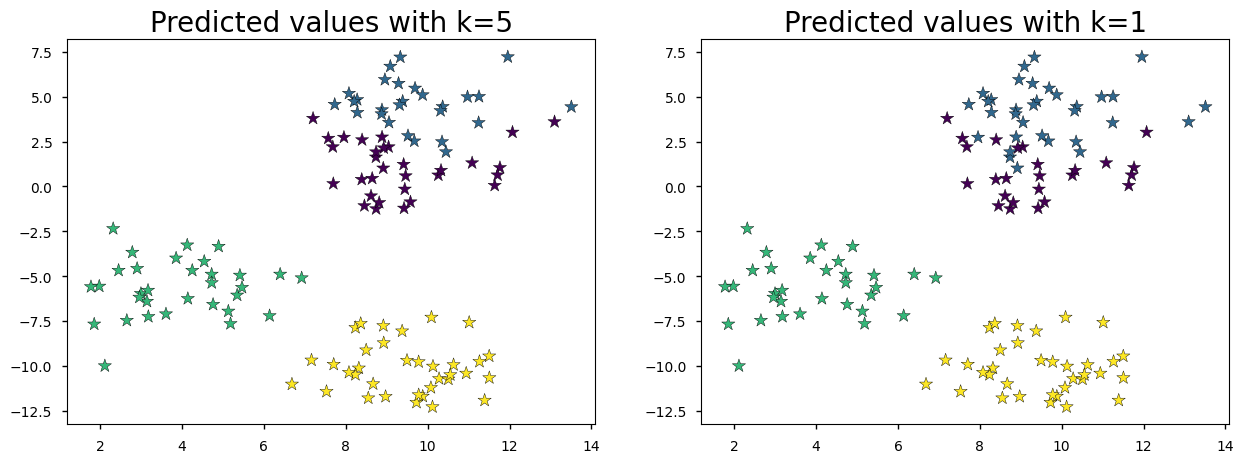

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=5", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=1", fontsize=20)
plt.show()